# Aplicación S&P500 y Naftrac


### Varianza
$$
\sigma_p^2 = \sum_{i=1}^{n} \sum_{k=1}^{n} w_i w_k \sigma_{ik} 
$$

Caso dos activos $(a,b)$:

$$\sigma^2_p = w_a^2 \sigma^2_a + w_b^2 \sigma_{b}^2 + 2 w_a w_b cov(a,b)$$

$$\sigma^2_p \neq w_a^2 \sigma^2_a + w_b^2 \sigma_{b}^2 $$





### Valor esperado
$$E[r_p]=E\left[\sum_{i=1}^{n}w_ir_i\right]=\sum_{i=1}^{n}w_iE\left[r_i\right]  $$


Caso dos activos $(a,b)$:
$$E[r_b] = w_1 \mu_r1 + w_2 \mu_r2 $$



***Nota: para este caso, no tenemos probabilidades asignadas por evento. La probabilidad de cada evento es entonces $\frac{1}{n}$***


Si queremos sacar el $w$ que minimiza la varianza de un portafolio:
$$w = \frac{\sigma^2_2 - cov(r_1, r_2)}{\sigma^2_1 + \sigma^2_2 - 2cov(r_1, r_2)} $$



In [3]:
# Bajamos los ETF de yahoo
import yfinance as yf
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

tickers = ['VOO', 'NAFTRAC.MX']
start_date = '2015-01-01'
St = yf.download(tickers, start=start_date)['Close']


[*********************100%%**********************]  2 of 2 completed


In [4]:
# Obten los rendimientos
rt = St.pct_change()

### Recordando

Si tenemos rendimientos diarios y los queremos convertir anual:
$$E[r_{anual}] = E[r_i] * 252 $$

Para el caso de la volatilidad, tenemos que multiplicar por raíz de 252
$$\sigma[r_{anual}] = \sigma_{ri} * \sqrt{252} $$



In [5]:
# Obten rendimientos anuales
df = pd.DataFrame()
df['rendimiento'] = rt.mean() * 252 
df['volatilidad'] = rt.std() * np.sqrt(252)

Text(0.1841437617373079, 0.10102474007517821, 'USA')

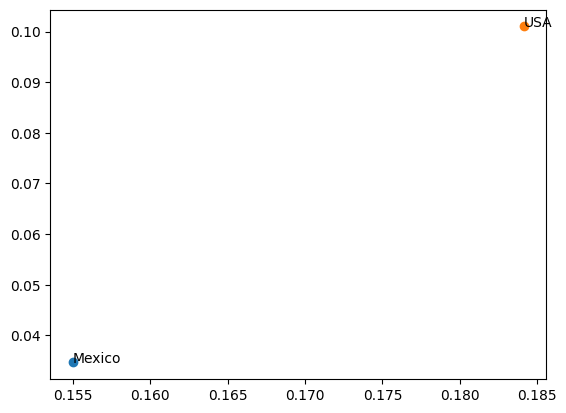

In [6]:
# Grafique los portafolios 
plt.scatter(df.iloc[0]['volatilidad'], df.iloc[0]['rendimiento'])
plt.text(df.iloc[0]['volatilidad'], df.iloc[0]['rendimiento'], 'Mexico')
plt.scatter(df.iloc[1]['volatilidad'], df.iloc[1]['rendimiento'])
plt.text(df.iloc[1]['volatilidad'], df.iloc[1]['rendimiento'], 'USA')

# ¿Cómo se verá un portafolio con diversos pesos en México y estados unidos?

In [7]:
# Pesos
w_mx = np.linspace(0,1,100)
w_us = 1 - w_mx
# Valores esperados individuales
ve_mx = rt["NAFTRAC.MX"].mean()
ve_us = rt["VOO"].mean()

# Varianzas individuales
var_mx = rt["NAFTRAC.MX"].var()
var_us = rt["VOO"].var()
# Volatilidades individuales
vol_mx = rt["NAFTRAC.MX"].std()
vol_us = rt["VOO"].std()

# Covarianza 
cov_mx_us = rt.cov()["NAFTRAC.MX"]["VOO"]
portafolios = pd.DataFrame({
    "w_mx": w_mx,
    "w_us": w_us,
    "rendimiento": (w_mx * ve_mx + w_us * ve_us)* 252, 
    "volatilidad": np.sqrt(w_mx **2 * var_mx + w_us**2 *var_us + 2 *w_us* cov_mx_us) * np.sqrt(252)
})
portafolios


,w_mx,w_us,rendimiento,volatilidad
0,0.000000,1.000000,0.101025,0.251023
1,0.010101,0.989899,0.100354,0.249077
2,0.020202,0.979798,0.099684,0.247140
3,0.030303,0.969697,0.099013,0.245211
4,0.040404,0.959596,0.098342,0.243292
...,...,...,...,...
95,0.959596,0.040404,0.037316,0.152822
96,0.969697,0.030303,0.036645,0.153312
97,0.979798,0.020202,0.035975,0.153839
98,0.989899,0.010101,0.035304,0.154402


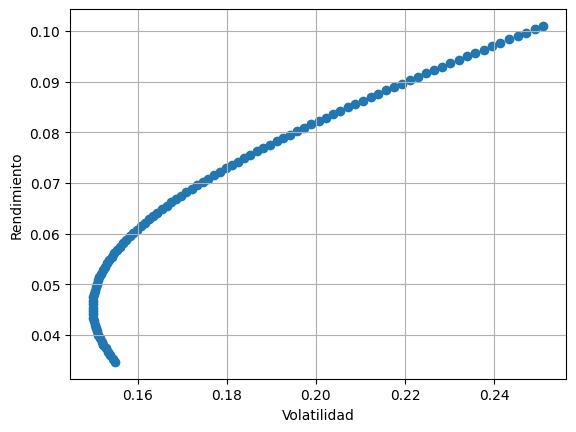

In [8]:
plt.scatter(portafolios.volatilidad, portafolios.rendimiento)

plt.xlabel('Volatilidad')
plt.ylabel('Rendimiento')
plt.grid()

/home/dell/.local/lib/python3.10/site-packages/matplotlib/text.py:757: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
/home/dell/.local/lib/python3.10/site-packages/matplotlib/text.py:758: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))
/home/dell/.local/lib/python3.10/site-packages/matplotlib/text.py:897: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))
/home/dell/.local/lib/python3.10/site-packages/matplotlib/text.py:898: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(

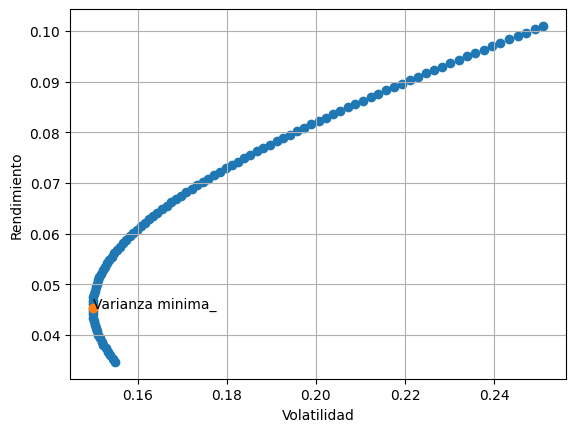

In [9]:
# ¿Cuál es el portafoio con varianza mínima?
portafolio_varianza_minima = portafolios[portafolios.volatilidad == portafolios.volatilidad.min()]

plt.scatter(portafolios.volatilidad, portafolios.rendimiento) 
plt.scatter(portafolio_varianza_minima.volatilidad, portafolio_varianza_minima.rendimiento) 
plt.text(portafolio_varianza_minima.volatilidad, portafolio_varianza_minima.rendimiento, 'Varianza minima_')
plt.xlabel('Volatilidad') 
plt.ylabel('Rendimiento') 
plt.grid()

# Varianza mínima de forma anaítica

En este casi, $w$ será el peso que le demos a USA

$$w = \frac{\sigma^2_2 - cov(r_1, r_2)}{\sigma^2_1 + \sigma^2_2 - 2cov(r_1, r_2)} $$


In [10]:
w_mx_min_var = (var_us- cov_mx_us) / (var_mx + var_us - 2*cov_mx_us)
w_us_min_var = 1- w_mx_min_var
(w_mx_min_var, w_us_min_var)

(0.6714023595929985, 0.32859764040700146)

In [11]:
portafolio_varianza_minima

,w_mx,w_us,rendimiento,volatilidad
83,0.838384,0.161616,0.045363,0.149922


In [12]:
# ¿Cual es esta varianza?


In [13]:
# Grafique los portafolios



# Haciendolo de forma matricial

### Varianza
$$
\sigma_p^2 = \sum_{i=1}^{n} \sum_{k=1}^{n} w_i w_k \sigma_{ik} = w^T \Sigma w
$$


### Valor esperado
$$E[r_p]=E\left[\sum_{i=1}^{n}w_ir_i\right]=\sum_{i=1}^{n}w_iE\left[r_i\right] = w^T E[r],$$



In [14]:
# Crear lista de pesos

def random_list(n_act):
    lista = np.random.rand(n_act)
    return lista / np.sum(lista) 

w1 = random_list(2)

$$E[p] = W^T \mu $$
(que es lo mismo que el producto punto)

In [15]:
# Calcula el rendimiento esperado de un portafolio con estos pesos
means = rt.mean() 

$$\sigma^2 = W * \Sigma * W^t $$

(Python interpreta las matrices al revés)

In [16]:
# Calcula la volatilidad de un portafolio con los pesos previos
w1.dot(means) 

0.0002705381293280294

In [17]:
rendimiento_matricial = w1.dot(means) 
rendimiento_matricial 

0.0002705381293280294

In [18]:
sigma = rt.cov()

varianza_matricial = w1.dot(sigma).dot(w1) 
varianza_matricial 

8.655484349747892e-05

In [19]:
# Crea una función que retorne el rendimiento esperado y la varianza de un portafolio
def random_portafolio(rt):
    # Definimos las constantes
    sigma = rt.cov()
    means = rt.mean()
    
    # Obtenemos pesos
    n_act = len(rt.keys())
    w = random_list(n_act)
    
    # Rendimiento esperado
    rendimiento_esperado = w.dot(means) 
    # Varianza
    varianza_portafolio = np.sqrt(w.dot(sigma).dot(w) ) 
    volatilidad_portafolio = np.sqrt(varianza_portafolio) * np.sqrt(252)
    
    return rendimiento_esperado, volatilidad_portafolio, w

random_portafolio(rt)
    

(0.0002893993139719352, 1.5463311731674025, array([0.42319058, 0.57680942]))

In [20]:
# Simula 100 portafolios, anualizalos
expected_returns = []
volatility = []
weights = []


for i in range(100):
    expected_return1, volatility1, weights1 = random_portafolio(rt) 
    expected_returns.append(expected_return1)
    volatility.append(volatility1)
    weights.append(weights1)

simulated_df = pd.DataFrame()
simulated_df['expected_returns'] = expected_returns
simulated_df['volatility'] = volatility

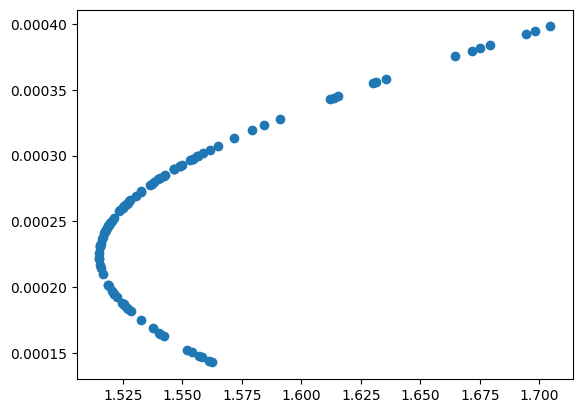

In [21]:
# Grafique los portafolios
plt.scatter(simulated_df.volatility, simulated_df.expected_returns)

## La forma matricial nos ayuda a hacerlo cuando hacemos el calculo para varios activos

¿Cómo se ve con 3 activos o más?


In [22]:
# Parametros para la función
tickers = ['VOO', 'VEA', 'VNQ', 'VWO']
start_date = '2015-01-01'

St = yf.download(tickers, start=start_date)['Close']

[*********************100%%**********************]  4 of 4 completed


In [23]:
# Obtenga los rendimientos
rt = St.pct_change() 

In [24]:
# Simula un portafolio
random_portafolio(rt)

(8.272298496984618e-05,
 1.7055517057333405,
 array([0.08613037, 0.55076892, 0.04069269, 0.32240802]))

In [25]:
# Simula 100 portafolios, anualizalos
expected_returns = []
volatility = []
weights = []


for i in range(500):
    expected_return1, volatility1, weights1 = random_portafolio(rt) 
    expected_returns.append(expected_return1)
    volatility.append(volatility1)
    weights.append(weights1)

simulated_df = pd.DataFrame()
simulated_df['expected_returns'] = expected_returns
simulated_df['volatility'] = volatility# Simula 500 portafolios 
simulated_df

,expected_returns,volatility
0,0.000099,1.697995
1,0.000137,1.671132
2,0.000163,1.685079
3,0.000273,1.670228
4,0.000168,1.671180
...,...,...
495,0.000158,1.670336
496,0.000137,1.669567
497,0.000115,1.670181
498,0.000171,1.669191


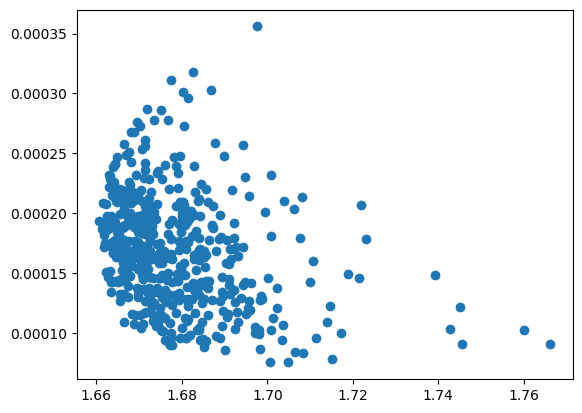

In [26]:
# Grafique los portafolios
plt.scatter(simulated_df.volatility, simulated_df.expected_returns)

In [27]:
# Encuentra el portafolio de minima varianza


In [28]:
# Grafica todo 


# ¿Qué pasa si no necesariamente quiero la mínima varianza?

- Quiero tener un rendimiento de 7% con el menor riesgo posible, no estoy interesado si ese es el de varianza mínima 

In [30]:
returns = simulated_df.query('expected_retuns > 0.07') 
retuns[returns.volatility == returns.volatility.min()]

UndefinedVariableError: name 'expected_retuns' is not defined